In [244]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
names = ['name','landmass','zone','area','population','language','religion','bars','stripes','colours','red','green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
dataset = pd.read_csv('flag.data',names=names,usecols=[*range(len(names))])

print(dataset.head(5))

             name  landmass  zone  area  population  language  religion  bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   stripes  colours  ...  saltires  quarters  sunstars  crescent  triangle  \
0        3        5  ...         0         0         1         0         0   
1        0        3  ...         0         0         1         0         0   
2        0        3  ...         0         0         1         1         0   
3        0        5  ...         0         0         0         0         1   
4        0        3  ...         0         0         0         0         0   

   icon  animate text  topleft  botright  
0

In [22]:
#all possible religious tags
religions = ['catholic','other christian','muslim','buddhist',
             'hindu','ethnic','marxist','other']

#sum of flags tagged by respective religion
totalFlags = []

for religion in religions:
    index = religions.index(religion)
    religionCount = sum(dataset['religion'] == index)
    totalFlags.append(religionCount)
    
#reshape into dataframe
totalFlags = pd.DataFrame(np.array(totalFlags).reshape(1,len(religions)))
totalFlags.columns = religions

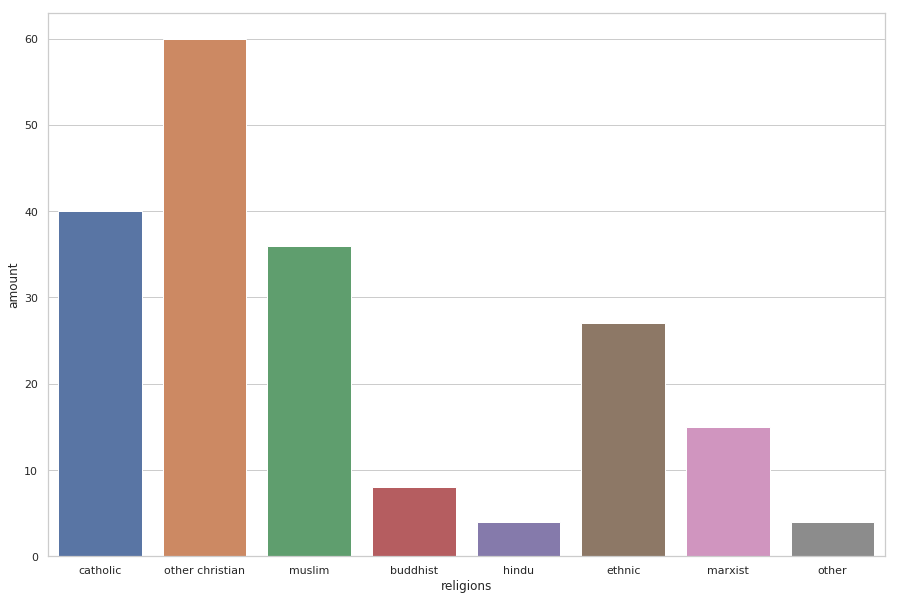

In [81]:
sns.set(style="whitegrid")
ax = sns.barplot(data=totalFlags)
ax.set(xlabel='religions', ylabel='amount')
sns.set(rc={'figure.figsize':(15,10)})
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))

In [55]:
#we only care about these columns
columns = ['mainhue','bars','stripes','sunstars']
plotData = dataset[columns]
plotData.columns = columns

plotData

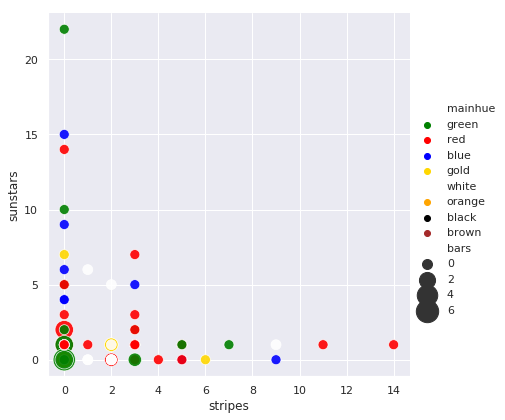

In [62]:
#represent the flag colors on plot
flagColors = ['green','red','blue','gold','white','orange','black','brown']
sns.set_palette(flagColors)

sns.relplot(x="stripes", y="sunstars", hue="mainhue", size="bars",sizes=(100, 500), 
            alpha=0.9,height=6, data=plotData, palette=flagColors)

In [77]:
landMasses = ['N. America','S. America','Europe','Africa','Asia','Oceania']
columns = ['landmass','bars','stripes','circles','crosses','saltires','quarters','sunstars',
          'crescent','triangle','icon','animate','text']
flagFeatsByLandmass = dataset[columns]

for i in range(1 , len(landMasses) + 1):
    landMassLabel = landMasses[i - 1]
    flagFeatsByLandmass.loc[flagFeatsByLandmass['landmass'] == i,'landmass'] = landMassLabel
    
flagFeatsByLandmass = pd.melt(flagFeatsByLandmass,id_vars="landmass",
                              var_name="feats",value_name="amount")
flagFeatsByLandmass

,landmass,feats,amount
0,Asia,bars,0
1,Europe,bars,0
2,Africa,bars,2
3,Oceania,bars,0
4,Europe,bars,3
5,Africa,bars,0
6,N. America,bars,0
7,N. America,bars,0
8,S. America,bars,0
9,S. America,bars,0


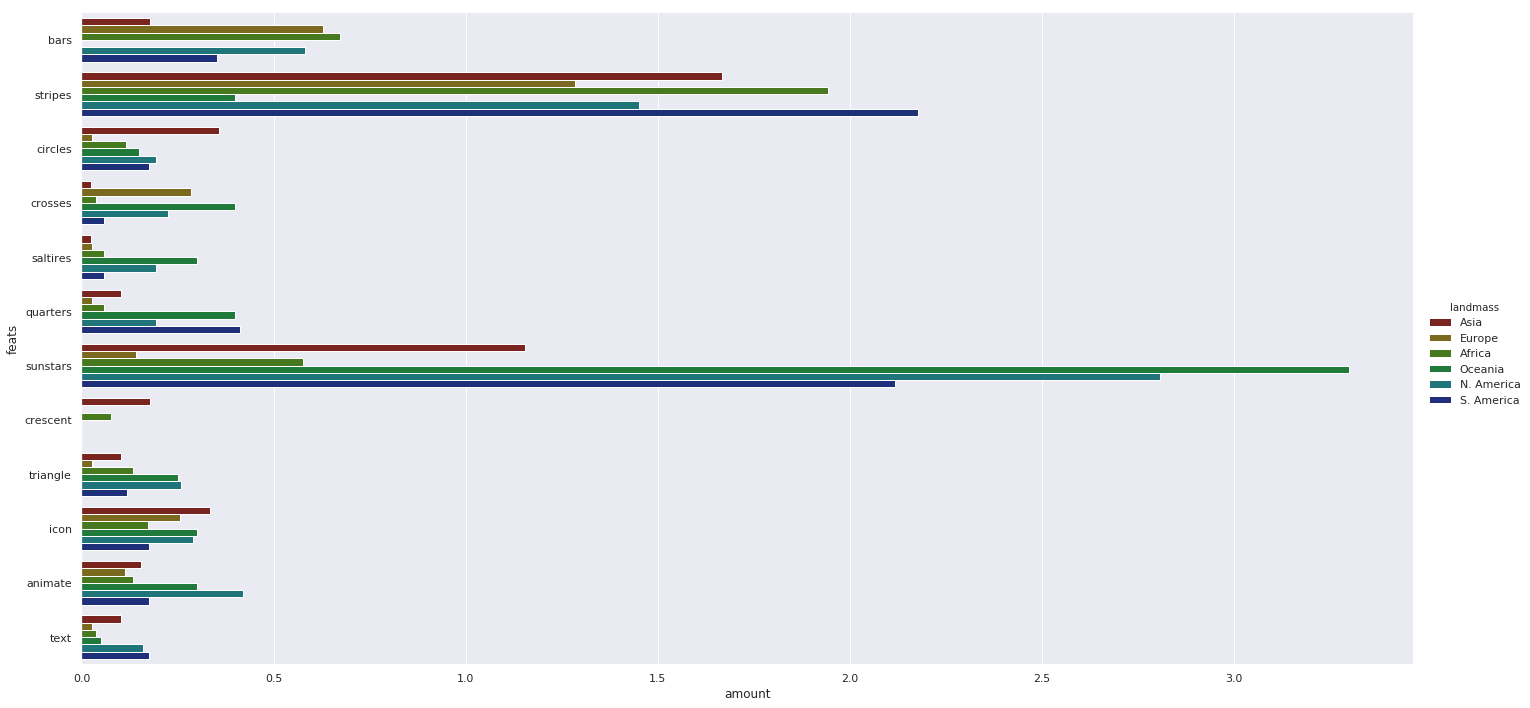

In [78]:
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
g = sns.factorplot(x='amount', y='feats', hue='landmass', data=flagFeatsByLandmass, kind='bar',
                  size=10,aspect=2,ci=None)


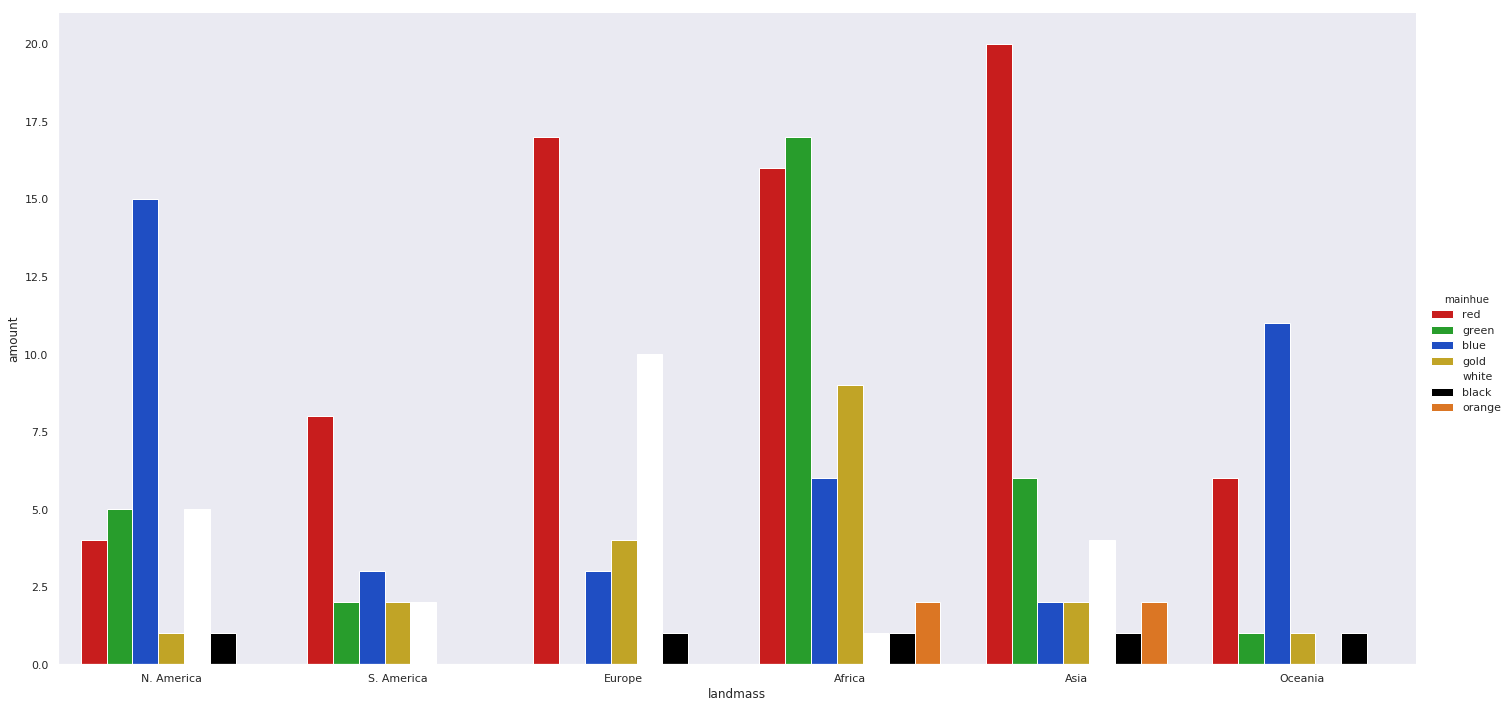

In [166]:
landFeatsColor = dataset.drop(columns=['name','zone','area','population','language','religion',
                                     'red','green','blue','gold','white','black','orange',
                                      'topleft','botright','colours','bars','stripes',
                                      'crosses','saltires','circles','quarters','sunstars',
                                      'crescent','triangle','icon','animate','text'])

for i in range(1,7):
    landFeatsColor.loc[landFeatsColor['landmass'] == i,'landmass'] = landMasses[i - 1]


colors = ['red','green','blue','gold','white','black','orange']

mainColorsByLandmass = []

for land in landMasses:
    landMainhue = []
    landmass = landFeatsColor[landFeatsColor['landmass'] == land]

    for color in colors:
        landMainhue.append(sum(landmass['mainhue'] == color))
    
    mainColorsByLandmass.append(landMainhue)


mainColorsByLandmass = pd.DataFrame(np.array(mainColorsByLandmass).reshape(6,len(colors)))
mainColorsByLandmass.columns = colors
mainColorsByLandmass['landmass'] = landMasses
mainColorsByLandmass = pd.melt(mainColorsByLandmass,id_vars="landmass",
                               var_name="mainhue",value_name="amount")

h = sns.factorplot(x='landmass', y='amount', hue='mainhue', data=mainColorsByLandmass, 
                   kind='bar',size=10,aspect=2,ci=None)

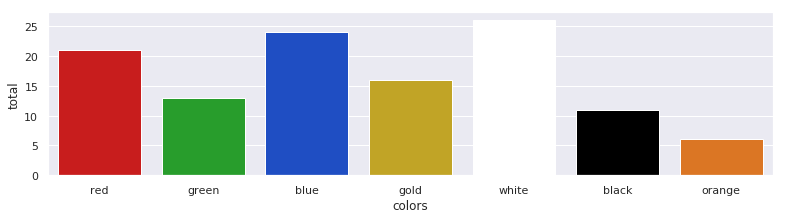

In [137]:
land1 = dataset[dataset['landmass'] == 1]

#bars, stripes, colorDiff, crosses, saltires, quarters, sunstars, icon
columns = ['red','green','blue','gold','white','black','orange']
flagColors = []

for color in columns:
    flagColors.append(sum(land1[color]))

flagColors = pd.DataFrame(np.array(flagColors).reshape(1,len(columns)))
flagColors.columns = columns

flatui = ["#e50000", "#15b01a", "#0343df", "#dbb40c", "#ffffff", "#000000", "#f97306"]
sns.set_palette(flatui)

ax = sns.barplot(data=flagColors)
ax.set(xlabel='colors', ylabel='total')
sns.set(rc={'figure.figsize':(13,3)})


In [202]:
landMasses = ['N. America','S. America','Europe','Africa','Asia','Oceania']
labels = ['circles','crosses','saltires','quarters','crescent',
          'triangle','icon','animate','text']

radarData = []

for i in range(1 , len(landMasses) + 1):
    land = dataset[dataset['landmass'] == i]

    flagFeatures = []

    for feat in labels:
        flagFeatures.append(np.mean(land[feat]))
    
    radarData.append(flagFeatures)

radarData = pd.DataFrame(np.array(radarData).reshape(len(landMasses), len(labels)))
radarData = radarData.T
radarData.columns = landMasses

radarData

,N. America,S. America,Europe,Africa,Asia,Oceania
0,0.193548,0.176471,0.028571,0.115385,0.358974,0.15
1,0.225806,0.058824,0.285714,0.038462,0.025641,0.40
2,0.193548,0.058824,0.028571,0.057692,0.025641,0.30
3,0.193548,0.411765,0.028571,0.057692,0.102564,0.40
4,0.000000,0.000000,0.000000,0.076923,0.179487,0.00
5,0.258065,0.117647,0.028571,0.134615,0.102564,0.25
6,0.290323,0.176471,0.257143,0.173077,0.333333,0.30
7,0.419355,0.176471,0.114286,0.134615,0.153846,0.30
8,0.161290,0.176471,0.028571,0.038462,0.102564,0.05


In [239]:
def radarPlot(row,color,land,labels):
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles = np.concatenate((angles,[angles[0]]))

    ax = plt.subplot(2,3,row+1, polar=True)
    
    ax.set_theta_offset(np.pi / 2)
    
    plt.xticks(angles[:-1], labels, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.10,0.20,0.30,0.40], 
               ["0.10","0.20","0.30","0.40"], color="grey", size=7)

    plt.ylim(0,0.50)

    stats = radarData[land].values
    stats = np.concatenate((stats,[stats[0]]))

    ax.plot(angles, stats, color=color,linewidth=2,linestyle='solid',label=land)
    ax.fill(angles, stats, color=color, alpha=0.4)

    title = land
    plt.title(title, size=11, color=color, y=1.1)

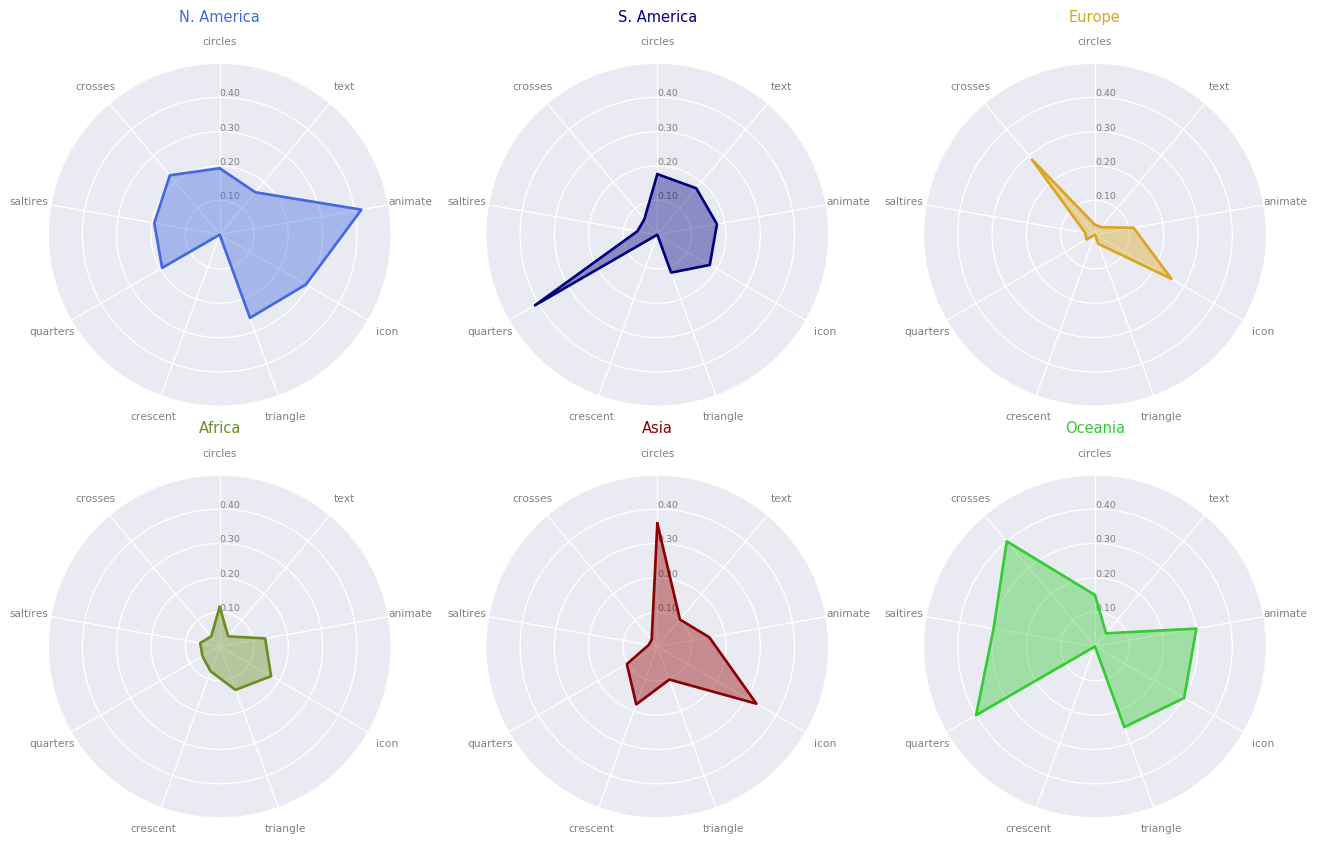

In [240]:
plotDpi=96
plt.figure(figsize=(1600/plotDpi, 1000/plotDpi), dpi=plotDpi)

colors = ['royalblue','navy','goldenrod','olivedrab','darkred','limegreen']

i = 0
for land in landMasses:
    color = colors[i]
    radarPlot(i,color,land,labels)
    i+=1

In [242]:
parallel_coordinates(radarData, 'landmass', colormap=plt.get_cmap("Set2"))
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'